<a href="https://colab.research.google.com/github/fightmeat/Machine_Leaning/blob/main/13_Titanic_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 필요한 라이브러리 로딩

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 로딩

In [33]:
titanic = pd.read_csv('train.csv')

# 데이터의 기본 탐색

In [34]:
titanic.info() # pandas에서 object는 문자

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    float64
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  WikiId       889 non-null    float64
 13  Name_wiki    889 non-null    object 
 14  Age_wiki     887 non-null    float64
 15  Hometown     889 non-null    object 
 16  Boarded      889 non-null    object 
 17  Destination  889 non-null    object 
 18  Lifeboat     345 non-null    object 
 19  Body    

In [35]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'WikiId', 'Name_wiki',
       'Age_wiki', 'Hometown', 'Boarded', 'Destination', 'Lifeboat', 'Body',
       'Class'],
      dtype='object')

- 'PassengerId' = 승객의 고유번호
- 'Survived' = 생존여부(0=사망, 1=생존)
- 'Pclass' = 객실 등급(1등실, 2등실, 3등실)
- 'Name' = 이름
- 'Sex' = 성별(male, female)
- 'Age' = 나이
- 'SibSp' = 동반한 형제자매와 배우자 수
- 'Parch' = 동반한 부모와 자식의 수
- 'Ticket' = 티켓 고유번호
- 'Fare' = 티켓 요금
- 'Cabin' = 객실 번호
- 'Embarked' = 승선한 항구(C, Q, S)

## 불필요한 열 제거

In [36]:
titanic = titanic.drop(['WikiId', 'Name_wiki',
       'Age_wiki', 'Hometown', 'Boarded', 'Destination', 'Lifeboat', 'Body',
       'Class'], axis=1)
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [37]:
titanic.to_csv('raw_titanic.csv')

In [38]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [39]:
# 수치데이터의 기술통계량
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- 훈련 데이터의 샘플 수 : 891(count=891)
- 훈련 데이터의 내 생존율 : 38.4%(Survived의 mean = 0.383838)

In [40]:
# 문자데이터(범주형 데이터)의 통계량
titanic.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


- 훈련 데이터의 남성의 수 : 577명(top의 Sex = male, freq 577)
- 훈련 데이터중 가장 많은 승선항 : S, 644명

In [41]:
# 객실 등급(Pclass)에 따른 생존율 비교
## Pclass, Survived
titanic[['Pclass','Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by= 'Survived',ascending=False)
## groupby에 as_index 를 False로 하면 Pclass를 index로 사용하지 않는다라는 의미
## ascending : 오름차순
## as_index 를 True로 하면 Pclass를 index로 사용한다

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


- 객실 등급이 좋을 수록 생존율이 높다.

In [42]:
# 성별(sex)에 따른 생존율 비교
titanic[['Sex','Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by= 'Survived',ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


- 여성의 생존율이 남성보다 훨씬 높다.

In [44]:
# 함께 승선한 형제자매와 배우자 수(SibSp)에 따른 생존율 비교
titanic[['SibSp','Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by= 'Survived',ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


- 동반가족수가 적을수록 생존률이 높다.

In [45]:
# 함께 승선한 부모와 자녀수(Parch)에 따른 생존율 비교
titanic[['Parch','Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by= 'Survived',ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


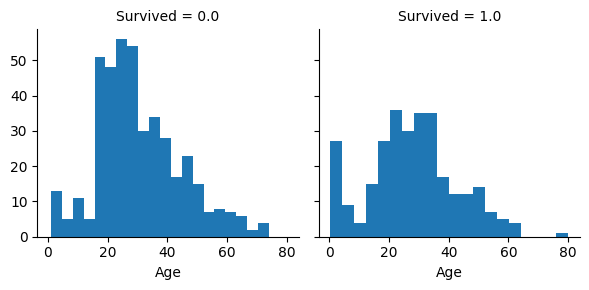

In [72]:
# 생존여부에 따른 연령(Age)의 분포 : 시각화(histogram)
import seaborn as sns
# 열(col)을 생존 여부로 나눔
g = sns.FacetGrid(titanic, col='Survived')
# 히스토그램으로 시각화, 연령의 분포를 확인, 히스토그램의 bin을 20으로 설정
g.map(plt.hist, 'Age', bins=20)
plt.show()

- 4세 이하의 아이의 생존율이 높다.

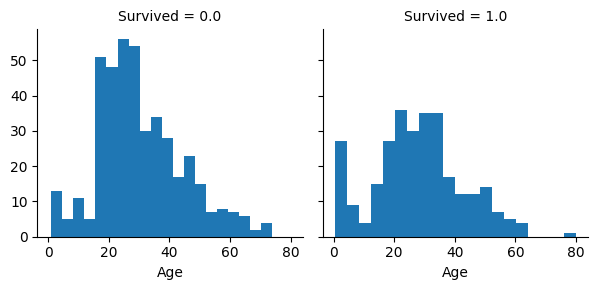

In [77]:
# 객실 등급(Pclass)과 생존 여부(Survived)에 따른 연령(Age) 분포
# 열(col)을 생존 여부로 나눔
g = sns.FacetGrid(titanic, col='Survived')
# 히스토그램으로 시각화, 연령의 분포를 확인, 히스토그램의 bin을 20으로 설정
g.map(plt.hist, 'Age', bins=20)
g.add_legend()
plt.show()

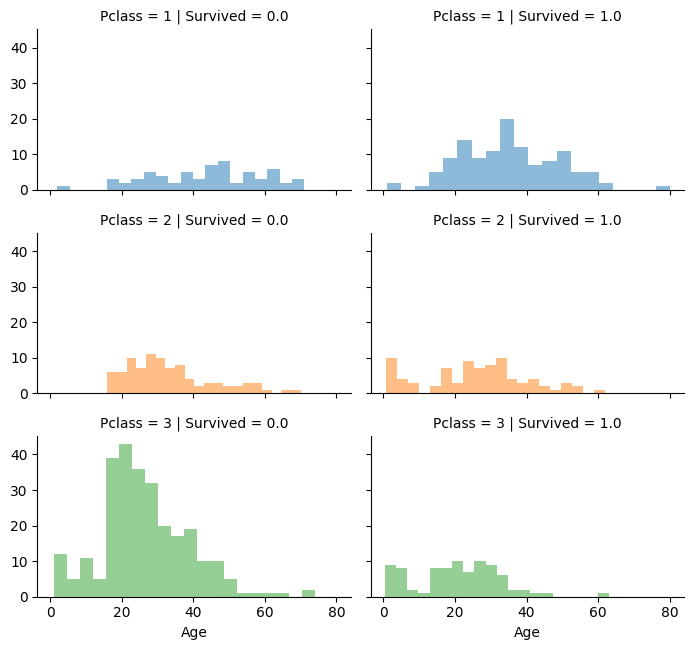

In [76]:
# 객실 등급(Pclass)과 생존 여부(Survived)에 따른 연령(Age) 분포
# 열(col)을 생존 여부로 나눔
g = sns.FacetGrid(titanic, col='Survived', row='Pclass', hue='Pclass', height=2.2, aspect=1.6)
# 히스토그램으로 시각화, 연령의 분포를 확인, 히스토그램의 bin을 20으로 설정
g.map(plt.hist, 'Age', bins=20, alpha=.5)
plt.show()

- 객실 등급이 3등급인 경우에 승객수가 가장 많고, 생존율은 가장 낮다.
- 객실 등급이 2등급인 경우 유아는 대부분 생존했다.
- 객실 등급이 1등급인 경우 생존율이 비교적 높다.

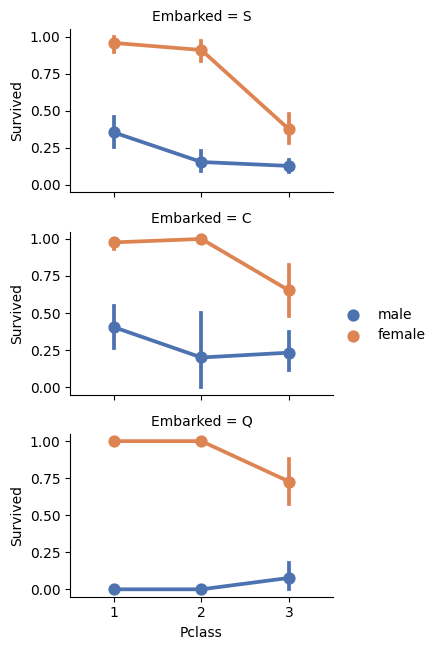

In [78]:
# 승선항(Embarked)와 객실 등급(Pclass)에 따른 생존율(Survived) 시각화
g = sns.FacetGrid(titanic, row='Embarked', height=2.2, aspect=1.6)
# sns.pointplot(data, x, y, hue)
# palette 옵션 : 전체를 하나의 색깔로 지정하는 것이 아니라 각기 다른 색으로 설정하기 위한 옵션
# order는 x축 순서
# hue_order : 색깔 순서[남성, 여성]
g.map(sns.pointplot, 'Pclass','Survived','Sex', palette='deep', order=[1,2,3], hue_order=['male','female'])
g.add_legend()
plt.show()

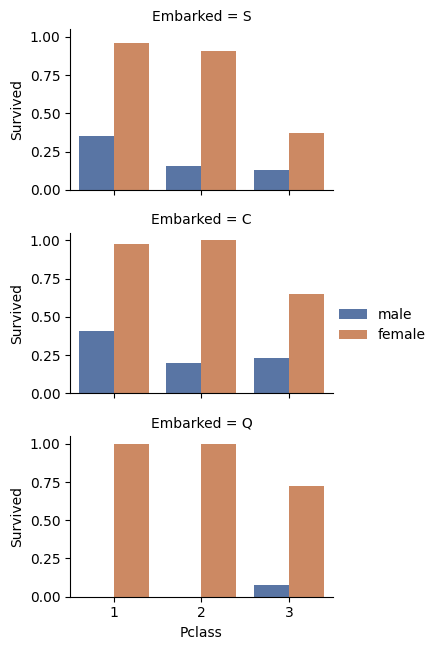

In [81]:
# 승선항(Embarked)와 객실 등급(Pclass)에 따른 생존율(Survived) 시각화
g = sns.FacetGrid(titanic, row='Embarked', height=2.2, aspect=1.6)
# sns.pointplot(data, x, y, hue)
# palette 옵션 : 전체를 하나의 색깔로 지정하는 것이 아니라 각기 다른 색으로 설정하기 위한 옵션
# order는 x축 순서
# hue_order : 색깔 순서[남성, 여성]
g.map(sns.barplot, 'Pclass','Survived','Sex', palette='deep', order=[1,2,3], hue_order=['male','female'], errorbar=None)
g.add_legend()
plt.show()

In [94]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    float64
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(3), int64(5), object(4)
memory usage: 83.7+ KB


In [83]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# 성별(Sex) 변수를 숫자형으로 변경하는 작업
titanic['Sex'] = titanic['Sex'].map({'female':1, 'male':0}).astype(int)

In [102]:
titanic['Sex'].value_counts()

0    577
1    314
Name: Sex, dtype: int64

In [103]:
titanic.info() # Cabin 버리고 Age는 평균값으로 채우고 Embarked는 범주형이므로 카운트해서 최빈값으로 대체한다.
# fillna() 메서드를 사용해서 채운다. 메모리를 잡아먹는건 int32로 바꾼다. 나중에 해보자.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    float64
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(3), int64(5), object(4)
memory usage: 83.7+ KB
